In [1]:
import quantum_phase_estimation as QPE
from qiskit.visualization import plot_histogram
import qiskit
import numpy as np

In [9]:
# 2*pi*φを与える（正解値）
phase = np.random.rand()
print(phase)

0.6184107757142246


phase:  0.6184107757142246


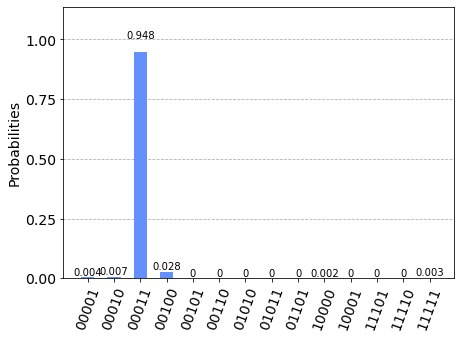

In [16]:
n_encode = 5
qc, theta = QPE.make_circuit(n_encode)

print('phase: ', phase)
qc_parametrized = qc.bind_parameters({theta: phase})
backend = qiskit.Aer.get_backend('qasm_simulator')
shots = 1024
results = qiskit.execute(qc_parametrized, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [17]:
values = list(results.get_counts().values())
keys = list(results.get_counts().keys())
idx = np.argmax(list(results.get_counts().values()))
ans = int(keys[idx], 2)
phase_estimated = ans / (2 ** n_encode)
true_phase = phase / (2 * np.pi)
print('True phase: {:.4f}'.format(true_phase))
print('Estimated phase: {:.4f}'.format(phase_estimated))
print('Diff: {:.4f}'.format(np.abs(true_phase - phase_estimated)))


True phase: 0.0984
Estimated phase: 0.0938
Diff: 0.0047
